# Questions

## Increase in surface salinity in the arctic, is there some kind of trend in obersved data? What about models?

## How well does models represent the changes in salinity, and can they be used as a good indication for the future?

## How does sea surface salinity affect the vertical ocean circulation? And is this influence impactfull?

## What can we say about the sea surface salinity in the future, and how will this affect the vertical circulation in the arctic?


In [16]:
import functions as f
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import s3fs
import cftime
import intake
import numpy as np
from joblib import Parallel, delayed

In [17]:
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))
path='escience2022/Antoine/ESA_SMOS_Arctic_Sea_Surface_Salinity/'
model_path='escience2022/Ada/daily/'
year = 2018
index = 250
sat_files = f.read_satellite_data(num_years=10, path=path)
dat = xr.open_dataset(s3.open(sat_files[year][index])).squeeze()
dat['y'] = dat['y']*1000
dat['x'] = dat['x']*1000
sss = dat['sss']

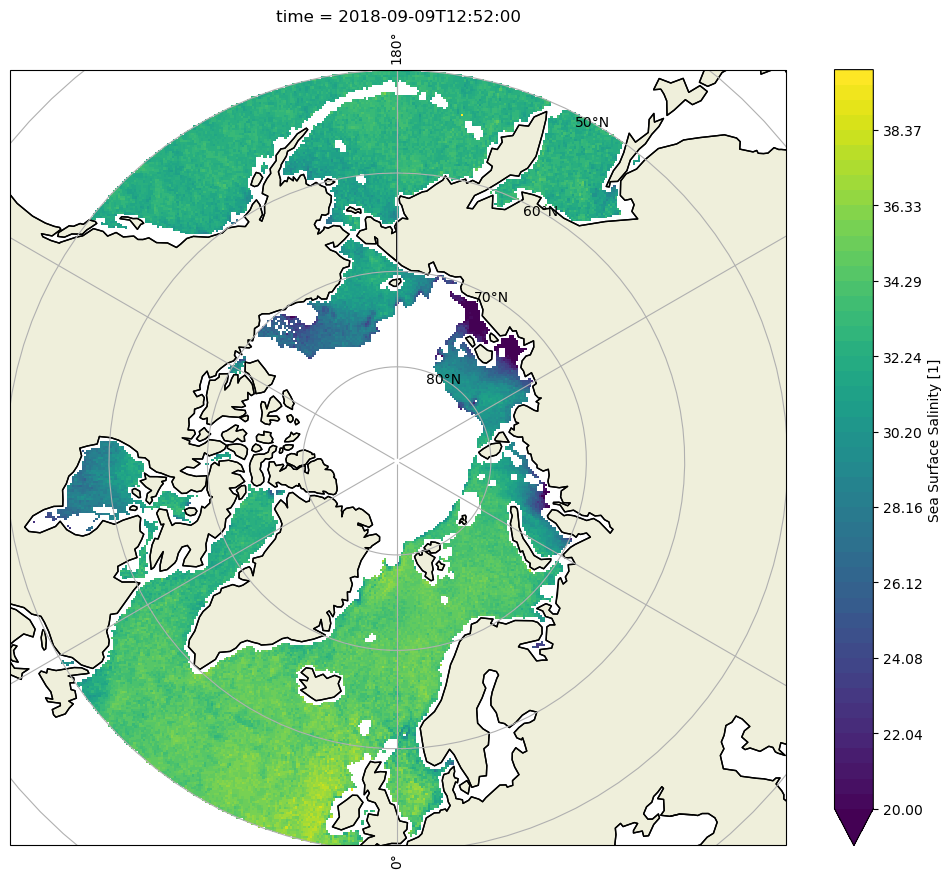

In [18]:
f.plot_sss_sat(dat['sss'], levels=50)

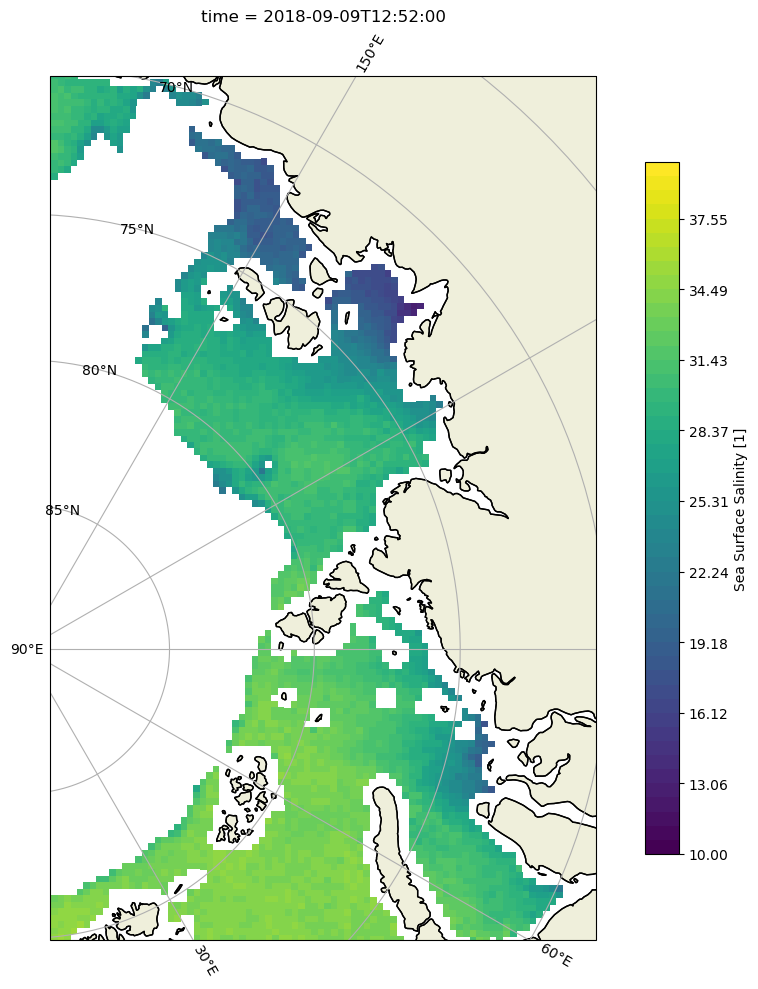

In [19]:
f.plot_sss_sat(sss, levels=50, extent=[60,170,85,70], vmin=10, vmax=40)

In [20]:
import time

start = time.time()

#fileset = Parallel(n_jobs=16)(delayed(f.read_files)(i) for i in sat_files[2013])
data = xr.concat(Parallel(n_jobs=16)(delayed(f.create_xr)(file) for file in sat_files[2013]), dim='time')
print(time.time()-start)

35.102339029312134


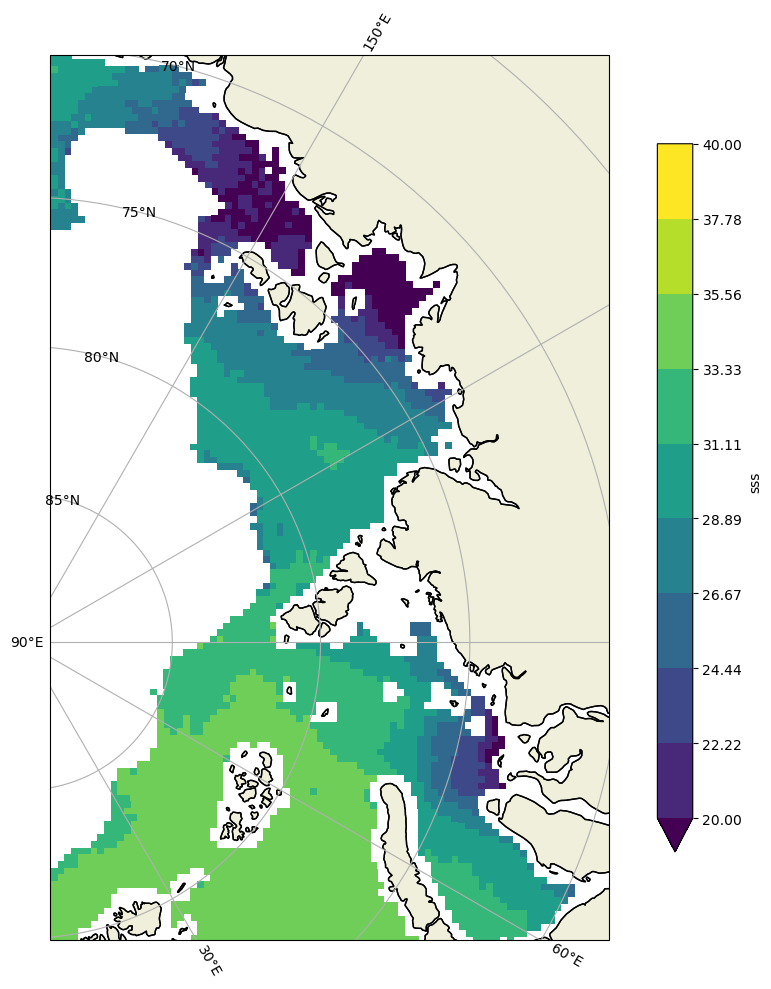

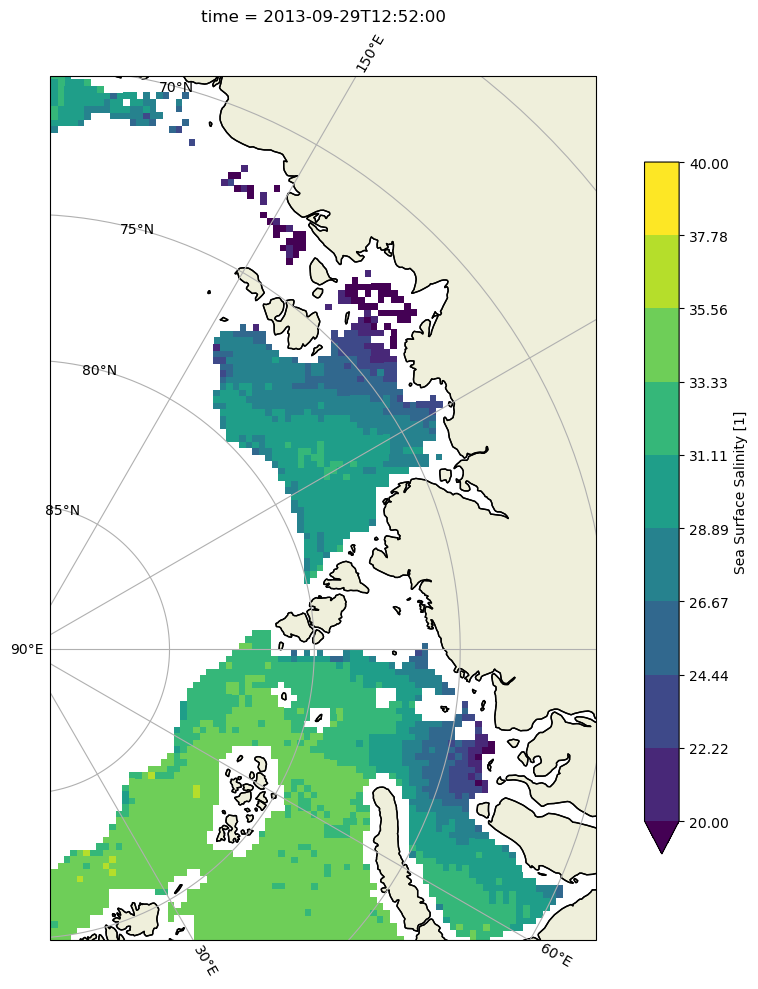

In [33]:
mlen = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]


m = data['sss'][250:280].mean('time')
#monthly_mean = data['sss'][mlen[0]:mlen[1]].mean()
#monthly_mean
f.plot_sss_sat(m, extent = [60,170,85,70])
f.plot_sss_sat(data['sss'][270], extent = [60,170,85,70])

In [ ]:
model_path='escience2022/Ada/daily/chlos_Oday_NorESM2-LM_historical_r1i1p1f1_gn_18500101-18591231.nc'
dat = xr.open_dataset(s3.open(model_path))
dat

In [ ]:
dat['i'] = dat['i']*360/len(dat['i'])
dat['j'] = dat['j']*180/len(dat['j'])
print(dat['j'])
print(dat['i'])

#sat_proj = ccrs.NorthPolarStereo()
#fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':sat_proj})
#dat['chlos'][0].plot.pcolormesh(
#    ax = ax,
#    cbar_kwargs={
#        'orientation':'vertical',
#        'shrink':.8
#        },
#    transform=ccrs.PlateCarree(),
#    )
#ax.set_extent([-180, 180, 90, 50], ccrs.PlateCarree())
#ax.gridlines(draw_labels=True)
#ax.coastlines()
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
#fig.tight_layout()


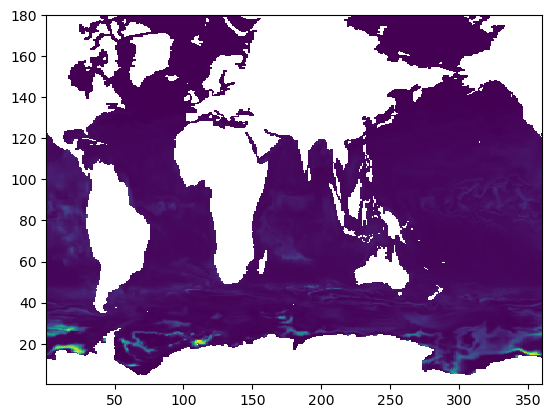

In [24]:
plt.pcolormesh(dat['i'], dat['j'], dat['chlos'][0])

In [ ]:
cat = col.search(source_id=['CESM2'], experiment_id=['historical'], table_id=['Amon'], variable_id=['tas'], member_id=['r1i1p1f1'])
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})

In [ ]:
dataset_list = list(dset_dict.keys())
dset = dset_dict[dataset_list[0]]
print(dset['tas'])

dset['tas'].plot()

In [ ]:
ctd = xr.open_dataset('3901598_prof.nc')
#print(ctd.variables)

ctd['LATITUDE']

In [ ]:
ctd['LONGITUDE']

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
st = ctd.isel(ctd['LONGITUDE'] == -3.9, method='nearest')
#specific_station = [ctd['LONGITUDE'].sel(-3.9, method='nearest'), ctd['latitude'].sel(70, method='nearest')]
ax.scatter(ctd['LONGITUDE'][:], ctd['LATITUDE'][:], transform=ccrs.PlateCarree())
ax.scatter(specific_station[0], specific_station[1], c='r')
ax.coastlines()
ax.gridlines(draw_labels=True)